In [1]:
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import xgboost as xgb

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import train_test_split
from catboost import CatBoostClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

C:\Users\royal\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
##for printing multiple output..
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import pairwise_distances
from scipy.sparse.linalg import svds
from lightfm import LightFM
from lightfm.evaluation import precision_at_k

from surprise import Reader, Dataset, SVD, evaluate

C:\Users\royal\Anaconda3\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn('LightFM was compiled without OpenMP support. '


### Read Csv

In [227]:
os.chdir(r'C:\Users\royal\Downloads\bb020fc4-9-Dataset\Dataset\training dataset')

In [228]:
##main user or account
account = pd.read_csv('Accounts.csv')
##interaction files
acc_prop = pd.read_csv('Accounts_properties.csv')
deal_prop = pd.read_csv('Deals_to_Properties.csv')
oppor = pd.read_csv('Opportunities.csv')

In [6]:
##test dataset have detail records in account table.
os.chdir(r'C:\Users\royal\Downloads\bb020fc4-9-Dataset\Dataset\Test dataset')
test  = pd.read_csv('Test_Data.csv')

In [208]:
##main item or movie file
os.chdir(r'C:\Users\royal\Downloads\bb020fc4-9-Dataset\Dataset\Property dataset')
propert = pd.read_csv('Properties.csv')

In [214]:
propert = pd.read_csv('property_rem.csv')

In [346]:
##property removed after findings from submission

In [14]:
#415 properties removed
propert = propert[propert.id_props.isin(list(set(propert.id_props.unique()).intersection(deal_prop.id_props.unique())))]

In [180]:
propert.shape

(9386, 24)

In [18]:
##1033 properties removed who's built year is before 1985
propert[(propert.year_built <= 1985)].shape
propert = propert[~(propert.year_built <= 1985)]
# propert[propert.year_built<=1950].shape

(6500, 24)

In [26]:
##195 removed failed submission
propert[propert.id_props.isin(list(set(subm.id_prop.unique())))].shape
propert = propert[~propert.id_props.isin(list(set(subm.id_prop.unique())))]

(214, 24)

In [20]:
##50 demolished property removed
## proposed,under construction and existing status building can reccomended
propert = propert[~(propert.building_status == 'Demolished')]

In [22]:
##167 removed who's sale year is before 2003
propert.shape
propert = propert[~(propert.sale_year < 2003)]

(11339, 24)

In [44]:
propert[(propert.sale_status == 'Y')].shape
propert = propert[~(propert.sale_status == 'Y')]

(1000, 24)

In [177]:
propert[(propert.id_props.isin(list(set(ll1))))]
propert = propert[~(propert.id_props.isin(list(set(ll1))))]

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year
206,a0I2A00000XQGSXUA5,Existing,"2016 Tax @ $14.43/sf, 2015 Est Tax @ $13.67/sf...",City-0376,Class A,County-0160,N,False,Market-0047,1.0,...,NaN,Office,Midwest,8.500000e+08,7/7/2014,1.200000,1302901.0,NaN,2009.0,2014.0
888,a0I2A00000XQGvOUAX,Existing,2015 Tax @ $40.25/sf,City-0070,NaN,County-0624,N,True,Market-0059,3.0,...,NaN,Retail,Southwest,1.061250e+07,5/11/2012,8.210000,133196.0,NaN,1992.0,2012.0
930,a0I2A00000XQGx3UAH,Existing,2015 Tax @ $3026.53/Unit; 2013 Ops @ $3263.36/...,City-0725,Class A,County-0624,N,False,Market-0059,12.0,...,118055.56,Multi-Housing,Southwest,4.250000e+07,7/20/2016,11.830000,203754.0,360.0,1996.0,2016.0
958,a0I2A00000XQGyPUAX,NaN,NaN,City-0323,NaN,County-0172,N,False,Market-0059,NaN,...,NaN,Self-Storage,Southwest,NaN,NaN,NaN,NaN,659.0,NaN,NaN
971,a0I2A00000XQGzBUAX,NaN,NaN,City-0019,Class A,County-0051,N,False,Market-0004,1.0,...,NaN,Office,Southwest,2.189000e+07,1/15/2016,1.851446,182925.0,NaN,1989.0,2016.0
1033,a0I2A00000XQH1qUAH,Existing,2005 Combined Tax/Ops @ $21.38/sf,City-0090,Class A,County-0636,N,False,Market-0016,2.0,...,21682.85,Multi-Housing,Southwest,6.700000e+06,5/1/2015,75.000000,1016000.0,309.0,2017.0,2015.0
1034,a0I2A00000XQH1sUAH,Existing,2009 Tax @ $95.44/sf,City-1673,Class B,County-0420,N,False,Market-0165,NaN,...,NaN,Retail,Northeast,5.500000e+07,12/16/2010,0.000000,1040000.0,0.0,1987.0,2010.0
1089,a0I2A00000XQH4eUAH,Existing,2006 Tax @ $4.77/sf; 2007 Ops @ $12.72/sf,City-1606,Class A,County-0400,N,False,Market-0178,1.0,...,NaN,Office,Southwest,5.600000e+07,5/20/2011,4.160000,483000.0,NaN,1991.0,2011.0
1291,a0I2A00000XQHDaUAP,Existing,2015 Tax @ $1.93/sf,City-0960,Class A,County-0403,N,False,Market-0109,NaN,...,NaN,Office,Midwest,1.300000e+08,12/20/2017,7.510000,1000000.0,NaN,1999.0,2017.0
1298,a0I2A00000XQHDrUAP,Existing,2016 Tax @ $3.75/sf,City-0970,Class A,County-0172,N,True,Market-0059,1.0,...,NaN,Office,Southwest,3.986000e+08,3/11/2015,11.500000,293890.0,NaN,1998.0,2015.0


In [178]:
propert.to_csv('property_rem.csv',index=False)

## cleanup

In [10]:
##same person involved in all deals.
deal_prop.drop('createdbyid', axis=1, inplace=True)

In [57]:
##id_props & id_deals are same.
propert.drop('id_deals', axis=1, inplace=True)

In [13]:
##id & id_deals were same
oppor.drop(oppor.columns[0], axis=1, inplace=True)

In [14]:
deal_prop.to_csv('Deals_to_Properties.csv',index=False)
acc_prop.to_csv('Accounts_properties.csv',index=False)
oppor.to_csv('Opportunities.csv',index=False)

In [58]:
os.chdir(r'C:\Users\royal\Downloads\bb020fc4-9-Dataset\Dataset\Property dataset')
propert.to_csv('Properties.csv',index=False)

In [12]:
oppor.columns[0]

'id_deals'

## Exploration

#### Accounts: This table has information on customers/accounts. These are the accounts of whom we are marketing the properties for sale.

In [8]:
account.head()

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
0,0012A000023XlCCQA0,1,2367,True,False,Private Investor/Developer,False,False,False,False,False,False,False,False,0,1,1,2,1,0
1,0012A000023XmOxQAK,9,7974,True,False,REIT,False,False,False,False,False,True,True,False,7,2,77,18,85,7
2,0012A000023YLqwQAG,891,50161,True,True,Bank / Thrift,False,False,False,False,False,True,True,False,40,851,693,996,1167,37
3,0012A000023XlNjQAK,34,14631,True,False,Conduit/CMBS,True,False,False,True,False,True,True,False,0,34,0,45,14,0
4,0012A000023YBFRQA4,283,194195,True,False,Life Insurance Company,False,False,False,False,False,True,True,False,63,220,393,383,591,46


In [9]:
account.shape    ##total account id's including present in test.
account['active_deals'].sum()  ##can represent number of record present in some of available file.

(2756, 20)

45368

#### Accounts to Properties: This table comprises information on properties that have been already bought by the accounts.Account information and the property details of the lead

In [10]:
acc_prop.head()

,id,id_accs,id_props
0,a062A00001Whq5tQAB,0012A000023XlCCQA0,a0I2A00000XQKwXUAX
1,a062A00001VmP7EQAV,0012A000023XmOxQAK,a0I2A00000XvUEwUAN
2,a062A00001VmQByQAN,0012A000023XmOxQAK,a0I2A00000XwQ13UAF
3,a062A00001VmQC2QAN,0012A000023XmOxQAK,a0I2A00000XwZyBUAV
4,a062A00001VmW8wQAF,0012A000023XmOxQAK,a0I2A00000ZGZClUAP


In [11]:
acc_prop.shape
acc_prop['id'].nunique()  ##unique id
acc_prop['id_accs'].nunique()   ##train id for which props are given
acc_prop['id_props'].nunique()  ##need to find out how it has more property id's then property file??

(70350, 3)

70350

2727

63001

In [48]:
##acc id's which are in both account and account_to property table.
len(set(acc_prop.id_accs.unique()).intersection(account.id_accs.unique()))
##acc id's which are in both test and account_to property table. found zero so no record for account to property for test id's
len(set(test.id_accs.unique()).intersection(acc_prop.id_accs.unique()))
##property id's which are in both property and account_to property table.
len(set(propert.id_props.unique()).intersection(acc_prop.id_props.unique()))
propert[propert.sale_status == 'Y'].shape

2727

0

8121

(0, 24)

In [49]:
##for property to account toproperty mapping
propert[propert.id_props.isin(list(set(propert[propert.sale_status == 'N'].id_props.unique()).intersection(set(propert.id_props.unique()).intersection(acc_prop.id_props.unique()))))].shape
##forproperty to deal toproperty mapping
propert[propert.id_props.isin(list(set(propert[propert.sale_status == 'N'].id_props.unique()).intersection(set(propert.id_props.unique()).intersection(deal_prop.id_props.unique()))))].shape

qa = propert[~propert.id_props.isin(list(set(propert[propert.sale_status == 'N'].id_props.unique()).intersection(set(propert.id_props.unique()).intersection(deal_prop.id_props.unique()))))]
qa[qa.sale_status == 'N'].shape
len(set(qa[qa.sale_status == 'N'].id_props.unique()).intersection(acc_prop.id_props.unique()))

qa = propert[~propert.id_props.isin(list(set(propert[propert.sale_status == 'N'].id_props.unique()).intersection(set(propert.id_props.unique()).intersection(acc_prop.id_props.unique()))))]
qa.shape
qa[qa.sale_status == 'N'].shape
len(set(qa[qa.sale_status == 'N'].id_props.unique()).intersection(deal_prop.id_props.unique()))

(8121, 24)

(9974, 24)

(0, 24)

0

(1853, 24)

(1853, 24)

1853

In [54]:
aa = set(deal_prop.id_props.unique()).intersection(acc_prop.id_props.unique())
propert[~propert.id_props.isin(aa.intersection(set(propert.id_props.unique())))].shape

(1853, 24)

In [53]:
###these 21 accounts are not reccomended when status='Y'
qa = propert[propert.id_props.isin(list(set(propert[propert.sale_status == 'N'].id_props.unique()).intersection(set(propert.id_props.unique()).intersection(acc_prop.id_props.unique()))))]
qa[qa.sale_status == 'N'].shape
len(set(qa[qa.sale_status == 'N'].id_props.unique()).intersection(deal_prop.id_props.unique()))

l1 = qa[qa.sale_status == 'Y'].id_props.values
##these 415 properties not reccomended so removed
#propert[~propert.id_props.isin(list(set(propert.id_props.unique()).intersection(deal_prop.id_props.unique())))]
qa = propert[~propert.id_props.isin(list(set(propert[propert.sale_status == 'N'].id_props.unique()).intersection(set(propert.id_props.unique()).intersection(acc_prop.id_props.unique()))))]
qa.shape
# l1 = propert[propert.sale_status == 'Y'].id_props.values
# l1 = propert[propert.year_built < 1985].id_props.values
# l1 = propert[(propert.building_status == 'Under Construction')].id_props.values
l1 = propert[~propert.id_props.isin(list(set(propert[propert.sale_status == 'N'].id_props.unique()).intersection(set(propert.id_props.unique()).intersection(acc_prop.id_props.unique()))))].id_props.values

# aa = set(deal_prop.id_props.unique()).intersection(acc_prop.id_props.unique())
# l1 = propert[~propert.id_props.isin(aa.intersection(set(propert.id_props.unique())))].id_props.values
len(l1)
sub_file_all_same(l1)

(8121, 24)

8121

(1853, 24)

1853

53737

In [235]:
propert[propert.id_props.isin(acc_prop[acc_prop.id_accs =='0012A000023XnJ0QAK'].id_props)].head()
propert[propert.id_props.isin(deal_prop[deal_prop.id_deals.isin(oppor[oppor.id_accs =='0012A000023XnJ0QAK'].id_deals)].id_props)].head(10)

# propert[propert.sale_date__c]
# propert['sale_year'] = pd.DatetimeIndex(propert['sale_date__c']).year

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year
3812,a0I2A00000XQJ40UAH,NaN,NaN,City-1510,NaN,County-0464,N,False,Market-0169,15.0,...,NaN,Retail,Southwest,29050000.0,1/31/2017,22.210,241831.0,NaN,2006.0,2017.0
6591,a0I2A00000XQL0lUAH,NaN,NaN,City-2059,NaN,County-0630,N,False,Market-0002,1.0,...,NaN,Retail,Southeast,7043000.0,11/14/2013,5.730,52600.0,NaN,2012.0,2013.0
6844,a0I2A00000XQLBvUAP,NaN,NaN,City-1779,NaN,County-0503,N,False,Market-0138,NaN,...,NaN,Retail,Southeast,22450000.0,2/3/2017,31.205,298755.0,NaN,1992.0,2017.0
8488,a0I2A00000XucBlUAJ,NaN,NaN,City-1852,NaN,County-0124,N,False,Market-0212,1.0,...,NaN,Retail,Southeast,12150000.0,7/12/2017,9.000,87349.0,NaN,1996.0,2017.0


,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year
805,a0I2A00000XQGsEUAX,NaN,NaN,City-0396,NaN,County-0431,N,False,Market-0050,NaN,...,NaN,Retail,Southeast,6154908.0,7/9/2013,23.24,124260.0,NaN,1986.0,2013.0
3230,a0I2A00000XQIdNUAX,NaN,NaN,City-1595,NaN,County-0217,N,False,Market-0175,NaN,...,NaN,Retail,Southeast,7100000.0,11/30/2006,14.70,165851.0,NaN,1988.0,2006.0
6275,a0I2A00000XQKnzUAH,NaN,NaN,City-0413,NaN,County-0291,N,False,Market-0011,NaN,...,NaN,Retail,Mid-Atlantic,NaN,NaN,NaN,66700.0,NaN,1990.0,NaN
6591,a0I2A00000XQL0lUAH,NaN,NaN,City-2059,NaN,County-0630,N,False,Market-0002,1.0,...,NaN,Retail,Southeast,7043000.0,11/14/2013,5.73,52600.0,NaN,2012.0,2013.0
8043,a0I2A00000XQM3wUAH,NaN,NaN,City-2096,NaN,County-0370,N,False,Market-0082,NaN,...,NaN,Retail,Southeast,NaN,NaN,8.18,74947.0,NaN,2004.0,NaN
8488,a0I2A00000XucBlUAJ,NaN,NaN,City-1852,NaN,County-0124,N,False,Market-0212,1.0,...,NaN,Retail,Southeast,12150000.0,7/12/2017,9.00,87349.0,NaN,1996.0,2017.0


In [412]:
propert.head()

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year
0,a0I2A00000XQGKnUAP,NaN,NaN,City-1975,Class A,County-0465,Y,True,Market-0239,NaN,...,2109090.91,Multi-Housing,Southeast,21440582.78,12/31/2016,19.60,508080.0,275.0,2014.0,2016.0
1,a0I2A00000XQGKtUAP,NaN,NaN,City-0648,Class A,County-0361,N,False,Market-0076,1.0,...,NaN,Multi-Housing,West,NaN,NaN,0.67,62524.0,100.0,2014.0,NaN
2,a0I2A00000XQGKwUAP,NaN,NaN,City-0424,NaN,County-0069,N,False,Market-0034,1.0,...,NaN,Retail,Southwest,NaN,NaN,NaN,8640.0,NaN,2012.0,NaN
3,a0I2A00000XQGKxUAP,NaN,NaN,City-0283,NaN,County-0404,N,False,Market-0149,NaN,...,NaN,Industrial,Southeast,NaN,NaN,NaN,513734.0,NaN,2011.0,NaN
4,a0I2A00000XQGKzUAP,NaN,NaN,City-0981,Class B,County-0203,N,False,Market-0112,20.0,...,106145.83,Multi-Housing,Southeast,45855000.00,10/31/2016,35.12,363747.0,432.0,1990.0,2016.0


#### Deal to Properties: This table comprises information on the deals that has materialized on the properties.Deal and properties mapping

In [13]:
deal_prop.head()

,id,id_deals,id_props
0,a0A2A00000TxIrIUAV,0062A00000o979GQAQ,a0I2A00000XQH8YUAX
1,a0A2A00000TxIrSUAV,0062A00000o94JrQAI,a0I2A00000XQJ4dUAH
2,a0A2A00000TxIrXUAV,0062A00000o94GJQAY,a0I2A00000XQJL0UAP
3,a0A2A00000TxIrcUAF,0062A00000o982fQAA,a0I2A00000XQKgkUAH
4,a0A2A00000TxIrhUAF,0062A00000o96M4QAI,a0I2A00000XQMEhUAP


In [462]:
deal_prop.shape
deal_prop['id'].nunique()    ##unique id's
deal_prop['id_deals'].nunique()  ##in single deal more than 1 property sold.
deal_prop['id_props'].nunique()  ##1 property can sold out more than 1 time.that's why count is less
len(set(deal_prop.id_props.unique()).intersection(acc_prop.id_props.unique()))    ##need to find out this relationship??

(25820, 3)

25820

20350

19701

15526

#### Opportunities: These include the historic deals for the accounts. Basically, this gives a transaction summary of the deals that have happened between the accounts and the properties. Succesful deal information

In [55]:
oppor.head(10)

,id_accs,accounting_date,best_initial_bid,id_deals,closedate,date_closed,deal_type,deal_update_flag,debt_yield,fiscal,fiscalquarter,fiscalyear,platform,property_group,property_type
0,0012A000023XvIOQA0,NaN,NaN,0062A00000moF1LQAU,8/12/2005,8/18/2005 0:00,Fixed-rate,True,NaN,2005 3,3,2005,Debt,Healthcare,Healthcare
1,0012A000023YFe1QAG,NaN,NaN,0062A00000moF9LQAU,2/6/2012,6/27/2012 12:00,Fixed-rate,True,NaN,2012 1,1,2012,Debt,Healthcare,Biotech
2,0012A000023YEDcQAO,8/12/2004,NaN,0062A00000moGodQAE,11/24/2003,8/11/2004 0:00,Construction Loan,True,NaN,2003 4,4,2003,Debt,Healthcare,Biotech
3,0012A000023YA3nQAG,NaN,NaN,0062A00000moBTHQA2,2/10/2006,4/19/2006 0:00,Fixed-rate,True,NaN,2006 1,1,2006,Debt,Healthcare,Healthcare
4,0012A000023XpRUQA0,NaN,NaN,0062A00000mo8OjQAI,7/13/2006,11/16/2006 0:00,Fixed-rate,True,NaN,2006 3,3,2006,Debt,Healthcare,Healthcare
5,0012A000023Y6OGQA0,12/27/2011,NaN,0062A00000moHgpQAE,8/16/2011,12/21/2011 0:00,Floating-Rate,True,0.0,2011 3,3,2011,Debt,Healthcare,Healthcare
6,0012A000023XtJbQAK,6/5/2006,NaN,0062A00000moBqVQAU,1/12/2006,5/30/2006 0:00,Construction Loan,True,NaN,2006 1,1,2006,Debt,Healthcare,Seniors Housing
7,0012A000023XtJbQAK,6/5/2006,NaN,0062A00000moCA1QAM,1/12/2006,5/30/2006 0:00,Construction Loan,True,NaN,2006 1,1,2006,Debt,Healthcare,Seniors Housing
8,0012A000023XtJbQAK,3/2/2006,NaN,0062A00000moCDiQAM,1/12/2006,2/28/2006 0:00,Construction Loan,True,NaN,2006 1,1,2006,Debt,Healthcare,Seniors Housing
9,0012A000023YAtbQAG,7/16/2008,NaN,0062A00000moDLeQAM,5/5/2008,7/16/2008 0:00,Fixed-rate,True,0.0,2008 2,2,2008,Debt,Healthcare,Healthcare


In [56]:
oppor.shape
oppor['id_accs'].nunique()   ##need to find out how this have more access id's then which in account table 2756
oppor['id_deals'].nunique()
len(set(deal_prop.id_deals.unique()).intersection(oppor.id_deals.unique()))
len(set(acc_prop.id_accs.unique()).intersection(oppor.id_accs.unique()))
len(set(account.id_accs.unique()).intersection(oppor.id_accs.unique()))

(26029, 15)

7245

26029

14438

1179

1179

#### Property Information.This database contains the universal list of properties and its details

In [360]:
propert.head(10)

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_sq_ft,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built
0,a0I2A00000XQGKnUAP,NaN,NaN,City-1975,Class A,County-0465,Y,True,Market-0239,NaN,...,1141.55,2109090.91,Multi-Housing,Southeast,21440582.78,12/31/2016,19.600,508080.0,275.0,2014.0
1,a0I2A00000XQGKtUAP,NaN,NaN,City-0648,Class A,County-0361,N,False,Market-0076,1.0,...,NaN,NaN,Multi-Housing,West,NaN,NaN,0.670,62524.0,100.0,2014.0
2,a0I2A00000XQGKwUAP,NaN,NaN,City-0424,NaN,County-0069,N,False,Market-0034,1.0,...,NaN,NaN,Retail,Southwest,NaN,NaN,NaN,8640.0,NaN,2012.0
3,a0I2A00000XQGKxUAP,NaN,NaN,City-0283,NaN,County-0404,N,False,Market-0149,NaN,...,NaN,NaN,Industrial,Southeast,NaN,NaN,NaN,513734.0,NaN,2011.0
4,a0I2A00000XQGKzUAP,NaN,NaN,City-0981,Class B,County-0203,N,False,Market-0112,20.0,...,126.06,106145.83,Multi-Housing,Southeast,45855000.00,10/31/2016,35.120,363747.0,432.0,1990.0
5,a0I2A00000XQGL2UAP,Existing,2008 Tax @ $0.60/sf,City-0088,NaN,County-0002,N,False,Market-0065,NaN,...,52.38,19032.26,Hotel-Lodging,West,2360000.00,9/14/2010,0.700,45052.0,124.0,2009.0
6,a0I2A00000XQGL4UAP,NaN,NaN,City-1808,NaN,County-0053,N,True,Market-0204,NaN,...,1195.17,597163.12,Hotel-Lodging,Southwest,84200000.00,4/30/2015,1.455,70450.0,141.0,2009.0
7,a0I2A00000XQGLCUA5,NaN,NaN,City-1462,NaN,County-0478,N,False,Market-0248,NaN,...,188.83,NaN,Retail,Southeast,19000000.00,8/31/2015,NaN,100621.0,NaN,1999.0
8,a0I2A00000XQGLFUA5,Existing,2011 Tax @ $6.49/sf; 2011 Ops @ $0.87/sf,City-1663,Class B,County-0436,N,True,Market-0183,1.0,...,551.04,NaN,Industrial,West,25830000.00,4/7/2005,3.158,46875.0,NaN,1986.0
9,a0I2A00000XQGLGUA5,NaN,NaN,City-1663,Class B,County-0436,N,True,Market-0183,1.0,...,127.64,NaN,Industrial,West,28750000.00,4/6/2005,8.620,225250.0,NaN,1996.0


In [13]:
propert.shape
propert['id_props'].nunique()
len(set(propert.id_props.unique()).intersection(acc_prop.id_props.unique()))
print('if total properties are 18298 & 14613 have record for bought by a account then unbought properties are: ',18298 - 14613)
len(set(propert.id_props.unique()).intersection(deal_prop.id_props.unique()))

(18298, 24)

18298

14613

if total properties are 18298 & 14613 have record for bought by a account then unbought properties are:  3685


17883

In [278]:
pp=propert[propert.year_built<1960]
pp.shape
propert[(propert.building_status == 'Proposed') | (propert.building_status == 'Demolished') | (propert.building_status == 'Under Construction')].shape
propert.building_status.unique()

(0, 23)

(261, 23)

array([nan, 'Existing', 'Proposed', 'Under Construction', 'Demolished'], dtype=object)

#### This dataset has the accounts for which the properties needs to be suggested. Also note that if a property has already been bought by an account, then it cannot be marketed to another account.

In [119]:
test.head()

,id_accs
0,0012A00002AXHJUQA5
1,0012A000023XlWaQAK
2,0012A000023Y4bYQAS
3,0012A000023XlbuQAC
4,0012A000023Xlh9QAC


In [163]:
test.shape
len(set(test.id_accs.unique()).intersection(oppor.id_accs.unique()))
len(set(test.id_accs.unique()).intersection(acc_prop.id_accs.unique()))
## both zero shows no interaction record for the test account ids.seem like new user's for test prediction's

(29, 1)

0

0

In [164]:
##get test id's record from the main Account file.
test_acc = account.loc[account['id_accs'].isin(list(test.id_accs.values))]

In [165]:
test_acc.head(10)

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
4,0012A000023YBFRQA4,283,194195,1,0,8,0,0,0,0,0,1,1,0,63,220,393,383,591,46
6,0012A000023XlWaQAK,261,127948,1,0,8,0,0,0,0,0,1,1,0,40,221,138,283,276,30
11,0012A000023YDnWQAW,606,217301,1,1,8,0,0,0,0,0,1,1,0,51,555,108,664,381,38
17,0012A000023Y9gNQAS,217,200215,1,0,1,0,0,0,0,0,1,1,0,170,47,558,339,643,133
20,0012A000023Xo0OQAS,364,157298,1,0,8,0,0,0,0,0,1,1,0,126,238,33,410,164,103
22,0012A000023Y4bYQAS,379,204360,1,0,8,0,0,0,0,0,1,1,0,92,287,86,478,359,72
32,0012A000023XlkNQAS,288,210435,1,0,1,0,0,0,0,0,1,1,0,224,64,247,355,299,188
34,0012A000023XlnqQAC,76,203637,1,0,1,0,0,0,1,0,1,1,0,35,41,148,128,193,28
37,0012A000023Xm35QAC,278,27290,1,1,8,0,0,1,0,0,1,1,0,25,253,7,189,73,16
40,0012A000023XwMRQA0,47,70500,1,0,1,0,0,0,0,0,1,1,0,32,15,204,54,229,26


## Findings:
1. Inconsistent number of records are in all the main and interaction table.need to take only those interaction which have in main Account and property table.delete others
2. Content based can't be used because user's in test are new.so,only collaborative filtering and hybrid can be applied.

## SVD

In [27]:
acc_prop['id_props'].nunique()

63001

In [61]:
intre = acc_prop.loc[acc_prop['id_props'].isin(list(set(propert.id_props.unique()).intersection(acc_prop.id_props.unique())))]
acc_prop.loc[acc_prop['id_props'].isin(list(set(propert.id_props.unique()).intersection(deal_prop.id_props.unique())))].shape

(11450, 3)

In [76]:
intre.shape
intre.head()

(11450, 4)

,id,id_accs,id_props,rate
1,a062A00001VmP7EQAV,0012A000023XmOxQAK,a0I2A00000XvUEwUAN,1
86,a062A00001VluvmQAB,0012A000023YLqwQAG,a0I2A00000XQIHiUAP,1
88,a062A00001VlwF1QAJ,0012A000023YLqwQAG,a0I2A00000XwOPFUA3,1
93,a062A00001Vm40OQAR,0012A000023YLqwQAG,a0I2A00000XQJwiUAH,1
97,a062A00001Vm7RhQAJ,0012A000023YLqwQAG,a0I2A00000XQGhNUAX,1


In [63]:
len(list(set(propert.id_props.unique()).intersection(intre.id_props.unique())))

8121

In [64]:
intre['rate']=1

C:\Users\royal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
intre_r = intre.drop('id',axis=1)
# propert.drop('id_deals', axis=1, inplace=True)

In [66]:
intre_r1 = intre_r.sample(frac=1).drop_duplicates(subset='id_props')

In [68]:
intre_m = intre_r1.pivot(index = 'id_accs', columns ='id_props', values = 'rate').fillna(0)

In [69]:
intre_r1.shape
intre_m.shape

(8121, 3)

(1568, 8121)

In [70]:
intre_m

id_props,a0I2A00000XQGKqUAP,a0I2A00000XQGKtUAP,a0I2A00000XQGKvUAP,a0I2A00000XQGKwUAP,a0I2A00000XQGKxUAP,a0I2A00000XQGKzUAP,a0I2A00000XQGL2UAP,a0I2A00000XQGL4UAP,a0I2A00000XQGL7UAP,a0I2A00000XQGLCUA5,...,a0I2A00000ZGs1TUAT,a0I2A00000ZGs1UUAT,a0I2A00000ZGsGoUAL,a0I2A00000ZGtDiUAL,a0I2A00000ZGtDxUAL,a0I2A00000ZGtE3UAL,a0I2A00000ZGu3uUAD,a0I2A00000ZGugoUAD,a0I2A00000ZGvMpUAL,a0I2A00000ZGwYxUAL
id_accs,,,,,,,,,,,,,,,,,,,,,
0012A000023XlNjQAK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0012A000023XlSVQA0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0012A000023XlStQAK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0012A000023XlUGQA0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0012A000023XlVSQA0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0012A000023XlVXQA0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0012A000023XlVhQAK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0012A000023XlVkQAK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0012A000023XlVrQAK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
R = intre_m.as_matrix()
intre_mean = np.mean(R, axis = 1)
intre_demeaned = R - intre_mean.reshape(-1, 1)

In [72]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(intre_demeaned, k = 50)

In [73]:
sigma = np.diag(sigma)
all_predicted_user  = np.dot(np.dot(U, sigma), Vt) + intre_mean.reshape(-1, 1)

In [74]:
preds = pd.DataFrame(all_predicted_user, columns = intre_m.columns)

In [75]:
preds.head()

id_props,a0I2A00000XQGKqUAP,a0I2A00000XQGKtUAP,a0I2A00000XQGKvUAP,a0I2A00000XQGKwUAP,a0I2A00000XQGKxUAP,a0I2A00000XQGKzUAP,a0I2A00000XQGL2UAP,a0I2A00000XQGL4UAP,a0I2A00000XQGL7UAP,a0I2A00000XQGLCUA5,...,a0I2A00000ZGs1TUAT,a0I2A00000ZGs1UUAT,a0I2A00000ZGsGoUAL,a0I2A00000ZGtDiUAL,a0I2A00000ZGtDxUAL,a0I2A00000ZGtE3UAL,a0I2A00000ZGu3uUAD,a0I2A00000ZGugoUAD,a0I2A00000ZGvMpUAL,a0I2A00000ZGwYxUAL
0,0.000017,0.001522,0.000450,0.001332,0.000147,0.000010,0.001308,0.001349,0.001406,0.001308,...,0.000208,0.000208,0.001359,0.000219,0.001332,0.001332,0.000046,0.001349,0.001340,0.000188
1,0.000007,0.000206,0.000090,0.000184,0.000042,0.000004,0.000181,0.000186,0.000192,0.000181,...,0.000053,0.000053,0.000187,0.000055,0.000184,0.000184,0.000017,0.000186,0.000185,0.000050
2,0.000006,0.002003,0.000464,0.001737,0.000110,0.000004,0.001705,0.001762,0.001840,0.001705,...,0.000173,0.000173,0.001775,0.000185,0.001737,0.001737,0.000024,0.001762,0.001749,0.000152
3,0.000007,0.000206,0.000090,0.000184,0.000042,0.000004,0.000181,0.000186,0.000192,0.000181,...,0.000053,0.000053,0.000187,0.000055,0.000184,0.000184,0.000017,0.000186,0.000185,0.000050
4,-0.000060,-0.001760,-0.001076,0.001173,-0.000415,-0.000038,0.001707,0.000795,-0.000241,0.001707,...,-0.000555,-0.000555,0.000599,-0.000580,0.001173,0.001173,-0.000154,0.000795,0.000986,-0.000512


In [77]:
# Import libraries from Surprise package
from surprise import Reader, Dataset, SVD, evaluate

# Load Reader library
reader = Reader()

# Load ratings dataset with Dataset library
data = Dataset.load_from_df(intre[['id_accs', 'id_props', 'rate']], reader)

# Split the dataset for 5-fold evaluation
data.split(n_folds=5)

In [78]:
# Use the SVD algorithm.
svd = SVD()
# Compute the RMSE of the SVD algorithm.
evaluate(svd, data, measures=['RMSE'])

C:\Users\royal\Anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
C:\Users\royal\Anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE of algorithm SVD.

------------
Fold 1
RMSE: 0.0409
------------
Fold 2
RMSE: 0.0432
------------
Fold 3
RMSE: 0.0434
------------
Fold 4
RMSE: 0.0407
------------
Fold 5
RMSE: 0.0431
------------
------------
Mean RMSE: 0.0423
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'rmse': [0.040923891638818995,
                             0.043225331027440958,
                             0.043421733669020773,
                             0.040702741660900071,
                             0.043059479558149587]})

In [79]:
trainset = data.build_full_trainset()
svd.train(trainset)

C:\Users\royal\Anaconda3\lib\site-packages\surprise\prediction_algorithms\algo_base.py:51: UserWarning: train() is deprecated. Use fit() instead
  warnings.warn('train() is deprecated. Use fit() instead', UserWarning)


In [80]:
intre[intre.id_accs =='0012A000023XmOxQAK']

,id,id_accs,id_props,rate
1,a062A00001VmP7EQAV,0012A000023XmOxQAK,a0I2A00000XvUEwUAN,1


In [84]:
svd.predict('0012A000023XmOxQAK', 'a0I2A00000XwOPFUA3')

Prediction(uid='0012A000023XmOxQAK', iid='a0I2A00000XwOPFUA3', r_ui=None, est=1, details={'was_impossible': False})

### Process Account File

In [166]:
account.head()

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
0,0012A000023XlCCQA0,1,2367,1,0,10,0,0,0,0,0,0,0,0,0,1,1,2,1,0
1,0012A000023XmOxQAK,9,7974,1,0,13,0,0,0,0,0,1,1,0,7,2,77,18,85,7
2,0012A000023YLqwQAG,891,50161,1,1,3,0,0,0,0,0,1,1,0,40,851,693,996,1167,37
3,0012A000023XlNjQAK,34,14631,1,0,4,1,0,0,1,0,1,1,0,0,34,0,45,14,0
4,0012A000023YBFRQA4,283,194195,1,0,8,0,0,0,0,0,1,1,0,63,220,393,383,591,46


In [167]:
account['investor_type'].fillna('Unknown',inplace=True)

In [168]:
##label encode the string data
ls = ['buyer_book','servicing_contract','investor_type','cmbs' ,'consultant' ,'correspondent' ,'foreign' ,'master_servicer' ,'lender_book' ,'loan_sales_book' ,'loan_servicing']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in ls:
    le = preprocessing.LabelEncoder()
    account[i] = le.fit_transform(account[i])

### Knn on account file

In [184]:
##KNN to get 5 nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KDTree
from sklearn.neighbors import NearestNeighbors

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(account.iloc[:,1:], account['id_accs'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [183]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(account.iloc[:,1:])

In [91]:
distances, indices = nbrs.kneighbors(account.iloc[:,1:])

In [117]:
# test_acc.reset_index(inplace = True)
test_acc.head()

,index,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,...,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
0,4,0012A000023YBFRQA4,283,194195,True,False,Life Insurance Company,False,False,False,...,False,True,True,False,63,220,393,383,591,46
1,6,0012A000023XlWaQAK,261,127948,True,False,Life Insurance Company,False,False,False,...,False,True,True,False,40,221,138,283,276,30
2,11,0012A000023YDnWQAW,606,217301,True,True,Life Insurance Company,False,False,False,...,False,True,True,False,51,555,108,664,381,38
3,17,0012A000023Y9gNQAS,217,200215,True,False,Advisor/Equity Fund,False,False,False,...,False,True,True,False,170,47,558,339,643,133
4,20,0012A000023Xo0OQAS,364,157298,True,False,Life Insurance Company,False,False,False,...,False,True,True,False,126,238,33,410,164,103


In [181]:
dd={}
for i,j in zip(test_acc.index.values,test_acc.id_accs.values):
    print(i,j)
    indices[i:i+1]
    test_id = indices[i:i+1][0][0]
    map_id = indices[i:i+1][0][1]
    distances[i:i+1]
    account.iloc[test_id:test_id+1,:]
    account.iloc[map_id:map_id+1,:]
    map_prop_id = account.iloc[map_id:map_id+1,:].id_accs.values
    map_prop_id[0]
#     propert[propert.id_props.isin(deal_prop[deal_prop.id_deals.isin(oppor[oppor.id_accs ==map_prop_id[0]].id_deals)].id_props)].head(1)
    propert[propert.id_props.isin(acc_prop[acc_prop.id_accs == map_prop_id[0]].id_props)].head(1)
    dd[j]=propert[propert.id_props.isin(acc_prop[acc_prop.id_accs == map_prop_id[0]].id_props)].id_props.values
    print('###################')

4 0012A000023YBFRQA4


array([[  4, 101]], dtype=int64)

array([[    0.        ,  1227.82612776]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
4,0012A000023YBFRQA4,283,194195,1,0,8,0,0,0,0,0,1,1,0,63,220,393,383,591,46


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
101,0012A000023XowrQAC,108,193100,1,0,10,0,0,0,0,0,1,1,0,94,14,163,224,197,79


'0012A000023XowrQAC'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
6 0012A000023XlWaQAK


array([[   6, 1074]], dtype=int64)

array([[    0.        ,  1765.21924984]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
6,0012A000023XlWaQAK,261,127948,1,0,8,0,0,0,0,0,1,1,0,40,221,138,283,276,30


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
1074,0012A000023XpKsQAK,7,129632,1,0,5,0,0,0,0,0,1,1,1,7,0,0,14,5,1


'0012A000023XpKsQAK'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
11 0012A000023YDnWQAW


array([[11, 32]], dtype=int64)

array([[    0.        ,  6903.48940754]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
11,0012A000023YDnWQAW,606,217301,1,1,8,0,0,0,0,0,1,1,0,51,555,108,664,381,38


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
32,0012A000023XlkNQAS,288,210435,1,0,1,0,0,0,0,0,1,1,0,224,64,247,355,299,188


'0012A000023XlkNQAS'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
17 0012A000023Y9gNQAS


array([[17, 79]], dtype=int64)

array([[    0.        ,  3177.78806719]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
17,0012A000023Y9gNQAS,217,200215,1,0,1,0,0,0,0,0,1,1,0,170,47,558,339,643,133


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
79,0012A00002AXHJUQA5,113,203365,1,0,1,0,0,0,0,0,1,1,0,66,47,330,174,383,47


'0012A00002AXHJUQA5'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
20 0012A000023Xo0OQAS


array([[ 20, 105]], dtype=int64)

array([[   0.        ,  626.01677294]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
20,0012A000023Xo0OQAS,364,157298,1,0,8,0,0,0,0,0,1,1,0,126,238,33,410,164,103


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
105,0012A000023XleaQAC,72,157694,1,0,1,0,0,0,0,0,1,1,0,39,33,128,117,138,35


'0012A000023XleaQAC'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
22 0012A000023Y4bYQAS


array([[22, 34]], dtype=int64)

array([[   0.        ,  913.33947686]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
22,0012A000023Y4bYQAS,379,204360,1,0,8,0,0,0,0,0,1,1,0,92,287,86,478,359,72


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
34,0012A000023XlnqQAC,76,203637,1,0,1,0,0,0,1,0,1,1,0,35,41,148,128,193,28


'0012A000023XlnqQAC'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
32 0012A000023XlkNQAS


array([[32, 22]], dtype=int64)

array([[    0.        ,  6085.98504763]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
32,0012A000023XlkNQAS,288,210435,1,0,1,0,0,0,0,0,1,1,0,224,64,247,355,299,188


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
22,0012A000023Y4bYQAS,379,204360,1,0,8,0,0,0,0,0,1,1,0,92,287,86,478,359,72


'0012A000023Y4bYQAS'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
34 0012A000023XlnqQAC


array([[34, 79]], dtype=int64)

array([[   0.        ,  384.77525908]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
34,0012A000023XlnqQAC,76,203637,1,0,1,0,0,0,1,0,1,1,0,35,41,148,128,193,28


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
79,0012A00002AXHJUQA5,113,203365,1,0,1,0,0,0,0,0,1,1,0,66,47,330,174,383,47


'0012A00002AXHJUQA5'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
37 0012A000023Xm35QAC


array([[ 37, 140]], dtype=int64)

array([[   0.        ,  406.77143459]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
37,0012A000023Xm35QAC,278,27290,1,1,8,0,0,1,0,0,1,1,0,25,253,7,189,73,16


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
140,0012A000023Xmd9QAC,10,27307,1,0,13,0,0,0,0,0,1,1,0,8,2,51,22,61,8


'0012A000023Xmd9QAC'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
40 0012A000023XwMRQA0


array([[40, 13]], dtype=int64)

array([[    0.        ,  1284.59799159]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
40,0012A000023XwMRQA0,47,70500,1,0,1,0,0,0,0,0,1,1,0,32,15,204,54,229,26


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
13,0012A000029wIHnQAM,45,71762,1,0,1,0,0,0,0,0,1,1,0,35,10,44,69,51,25


'0012A000029wIHnQAM'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
51 0012A000026WwqxQAC


array([[ 51, 148]], dtype=int64)

array([[    0.        ,  1059.11283629]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
51,0012A000026WwqxQAC,75,92526,1,0,10,0,0,0,0,0,1,1,0,46,29,257,133,309,45


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
148,0012A000023XvdPQAS,42,93577,1,0,10,0,0,0,0,0,1,0,0,18,24,210,56,230,16


'0012A000023XvdPQAS'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
54 0012A000023YKsuQAG


array([[54, 85]], dtype=int64)

array([[   0.        ,  648.26923419]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
54,0012A000023YKsuQAG,133,79227,1,0,1,0,0,0,1,0,1,1,0,50,83,14,199,84,30


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
85,0012A000023YLmuQAG,151,79872,1,0,3,0,0,0,0,0,1,1,0,22,129,20,224,97,17


'0012A000023YLmuQAG'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
79 0012A00002AXHJUQA5


array([[79, 34]], dtype=int64)

array([[   0.        ,  384.77525908]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
79,0012A00002AXHJUQA5,113,203365,1,0,1,0,0,0,0,0,1,1,0,66,47,330,174,383,47


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
34,0012A000023XlnqQAC,76,203637,1,0,1,0,0,0,1,0,1,1,0,35,41,148,128,193,28


'0012A000023XlnqQAC'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
80 0012A000023XlnWQAS


array([[80, 93]], dtype=int64)

array([[   0.        ,  113.67497526]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
80,0012A000023XlnWQAS,43,95272,1,0,1,0,0,0,0,0,1,1,0,29,14,106,74,128,20


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
93,0012A000023XrTNQA0,72,95374,1,0,1,0,0,0,1,0,1,1,0,48,24,83,97,122,31


'0012A000023XrTNQA0'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
91 0012A000023YAupQAG


array([[ 91, 451]], dtype=int64)

array([[    0.        ,  2165.65117228]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
91,0012A000023YAupQAG,53,88294,1,0,1,0,0,0,0,0,1,1,0,39,14,68,81,80,28


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
451,0012A000023XldbQAC,38,86133,1,0,1,0,0,0,0,0,0,1,0,32,6,150,73,194,29


'0012A000023XldbQAC'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
93 0012A000023XrTNQA0


array([[93, 80]], dtype=int64)

array([[   0.        ,  113.67497526]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
93,0012A000023XrTNQA0,72,95374,1,0,1,0,0,0,1,0,1,1,0,48,24,83,97,122,31


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
80,0012A000023XlnWQAS,43,95272,1,0,1,0,0,0,0,0,1,1,0,29,14,106,74,128,20


'0012A000023XlnWQAS'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
120 0012A000029ZzX1QAK


array([[120,  96]], dtype=int64)

array([[    0.       ,  3070.9373162]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
120,0012A000029ZzX1QAK,359,106567,1,0,1,0,0,0,0,0,1,1,0,239,120,1295,476,1479,184


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
96,0012A000023XurYQAS,105,109059,1,0,13,0,0,0,0,0,1,1,0,28,77,156,162,180,22


'0012A000023XurYQAS'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
133 0012A000023YB67QAG


array([[133, 220]], dtype=int64)

array([[    0.        ,  1665.04834765]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
133,0012A000023YB67QAG,294,122561,1,0,3,0,0,0,1,0,0,1,0,105,189,14,404,172,88


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
220,0012A000023Xlp3QAC,80,120950,1,0,1,0,0,0,0,0,1,1,0,73,7,42,113,67,63


'0012A000023Xlp3QAC'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
165 0012A000023YLFWQA4


array([[165, 175]], dtype=int64)

array([[   0.        ,  747.14255668]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
165,0012A000023YLFWQA4,105,68091,1,1,1,0,0,0,0,0,1,1,0,55,50,125,521,198,47


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
175,0012A000023XlvBQAS,152,68759,1,0,1,0,0,0,1,0,1,1,0,135,17,76,222,118,111


'0012A000023XlvBQAS'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
200 0012A000023XlbuQAC


array([[200, 480]], dtype=int64)

array([[    0.        ,  2162.23241119]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
200,0012A000023XlbuQAC,284,132408,1,0,1,0,0,0,0,0,1,1,0,224,60,231,384,260,181


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
480,0012A000023XonpQAC,88,130331,1,0,1,0,0,0,1,0,0,1,0,48,40,563,251,642,48


'0012A000023XonpQAC'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
227 0012A000023XlhdQAC


array([[227, 220]], dtype=int64)

array([[   0.        ,  568.16634888]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
227,0012A000023XlhdQAC,169,120454,1,0,8,0,0,0,0,0,1,1,0,12,157,82,186,248,9


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
220,0012A000023Xlp3QAC,80,120950,1,0,1,0,0,0,0,0,1,1,0,73,7,42,113,67,63


'0012A000023Xlp3QAC'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
266 0012A000023Xlh9QAC


array([[266, 511]], dtype=int64)

array([[   0.        ,  269.27123872]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
266,0012A000023Xlh9QAC,299,11365,1,1,8,0,0,1,0,0,1,1,0,12,287,11,294,98,9


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
511,0012A000023XsHdQAK,437,11308,1,1,8,0,0,0,0,0,1,1,0,4,433,3,456,148,4


'0012A000023XsHdQAK'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
283 0012A000023XoRjQAK


array([[283, 450]], dtype=int64)

array([[   0.        ,  254.63503294]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
283,0012A000023XoRjQAK,204,56753,1,1,8,0,0,1,0,0,1,1,0,45,159,73,252,207,24


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
450,0012A000023Xm1OQAS,315,56907,1,1,8,0,0,1,0,0,1,1,0,5,310,121,211,211,4


'0012A000023Xm1OQAS'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
403 0012A000023XmmFQAS


array([[403, 498]], dtype=int64)

array([[   0.        ,  134.21251805]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
403,0012A000023XmmFQAS,74,17538,1,1,8,0,0,0,1,0,1,1,0,3,71,1,78,96,1


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
498,0012A000023XmfsQAC,16,17543,1,0,13,0,0,0,0,0,1,1,0,8,8,6,25,8,6


'0012A000023XmfsQAC'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
510 0012A000023XmRwQAK


array([[510,   6]], dtype=int64)

array([[    0.        ,  1935.63581285]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
510,0012A000023XmRwQAK,46,126061,1,0,1,0,0,0,1,0,1,1,0,23,23,359,81,378,20


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
6,0012A000023XlWaQAK,261,127948,1,0,8,0,0,0,0,0,1,1,0,40,221,138,283,276,30


'0012A000023XlWaQAK'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
563 0012A000023Y1rtQAC


array([[ 563, 1451]], dtype=int64)

array([[  0.        ,  99.94498487]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
563,0012A000023Y1rtQAC,51,54523,1,0,1,0,0,0,0,0,1,1,0,15,36,34,70,62,6


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
1451,0012A000029wHw0QAE,20,54460,0,0,10,0,0,0,0,0,0,0,0,16,4,76,26,77,11


'0012A000029wHw0QAE'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
730 0012A000023Xp5LQAS


array([[730, 494]], dtype=int64)

array([[   0.        ,  101.50862032]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
730,0012A000023Xp5LQAS,58,3116,1,0,10,1,0,0,0,0,1,1,0,9,49,2,92,17,9


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
494,0012A000023XlezQAC,16,3075,1,0,3,0,0,0,0,0,1,1,0,0,16,1,18,8,0


'0012A000023XlezQAC'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
737 0012A000023Xp4LQAS


array([[ 737, 1451]], dtype=int64)

array([[   0.        ,  699.81569002]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
737,0012A000023Xp4LQAS,44,53762,1,0,10,0,0,0,0,0,1,1,0,34,10,65,64,74,16


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
1451,0012A000029wHw0QAE,20,54460,0,0,10,0,0,0,0,0,0,0,0,16,4,76,26,77,11


'0012A000029wHw0QAE'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################
907 0012A00002JF3YmQAL


array([[907, 159]], dtype=int64)

array([[    0.        ,  3064.49783815]])

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
907,0012A00002JF3YmQAL,68,113036,1,0,1,0,0,0,0,0,1,1,0,40,28,12,3,33,10


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
159,0012A000023Xly3QAC,65,116097,1,0,10,0,0,0,1,0,1,1,0,45,20,43,133,86,34


'0012A000023Xly3QAC'

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


###################


In [126]:
indices[11:21]
distances[11:21]

array([[  11,   32],
       [  12, 1076],
       [  13,  412],
       [  14, 2533],
       [  15, 1255],
       [  16,   39],
       [  17,   79],
       [  18,  660],
       [  19, 1732],
       [  20,  105]], dtype=int64)

array([[    0.        ,  6903.48940754],
       [    0.        ,    46.11941023],
       [    0.        ,    40.17461885],
       [    0.        ,    11.91637529],
       [    0.        ,    90.59801322],
       [    0.        ,   367.7662301 ],
       [    0.        ,  3177.78806719],
       [    0.        ,   201.57380782],
       [    0.        ,   152.79070652],
       [    0.        ,   626.01677294]])

In [182]:
dd

{'0012A000023XlWaQAK': array([], dtype=object),
 '0012A000023XlbuQAC': array([], dtype=object),
 '0012A000023Xlh9QAC': array([], dtype=object),
 '0012A000023XlhdQAC': array([], dtype=object),
 '0012A000023XlkNQAS': array([], dtype=object),
 '0012A000023XlnWQAS': array([], dtype=object),
 '0012A000023XlnqQAC': array([], dtype=object),
 '0012A000023Xm35QAC': array([], dtype=object),
 '0012A000023XmRwQAK': array([], dtype=object),
 '0012A000023XmmFQAS': array([], dtype=object),
 '0012A000023Xo0OQAS': array([], dtype=object),
 '0012A000023XoRjQAK': array([], dtype=object),
 '0012A000023Xp4LQAS': array([], dtype=object),
 '0012A000023Xp5LQAS': array([], dtype=object),
 '0012A000023XrTNQA0': array([], dtype=object),
 '0012A000023XwMRQA0': array([], dtype=object),
 '0012A000023Y1rtQAC': array([], dtype=object),
 '0012A000023Y4bYQAS': array([], dtype=object),
 '0012A000023Y9gNQAS': array([], dtype=object),
 '0012A000023YAupQAG': array([], dtype=object),
 '0012A000023YB67QAG': array([], dtype=o

In [115]:
account.iloc[20:22,:]
account.iloc[105:107,:]

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
20,0012A000023Xo0OQAS,364,157298,1,0,8,0,0,0,0,0,1,1,0,126,238,33,410,164,103
21,0012A000023XnT9QAK,20,8031,1,0,2,0,0,0,0,0,1,1,0,0,20,56,25,423,0


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
105,0012A000023XleaQAC,72,157694,1,0,1,0,0,0,0,0,1,1,0,39,33,128,117,138,35
106,0012A000023Xo4PQAS,9,46895,1,0,1,0,0,0,1,0,1,1,0,5,4,30,17,33,5


In [116]:
acc_prop[acc_prop.id_accs == 'a0I2A00000XQLImUAP']
propert[propert.id_props.isin(acc_prop[acc_prop.id_accs =='a0I2A00000XQLImUAP'].id_props)].head()
propert[propert.id_props.isin(deal_prop[deal_prop.id_deals.isin(oppor[oppor.id_accs =='0012A000023XleaQAC'].id_deals)].id_props)].head()

,id,id_accs,id_props
7664,a062A00001VluwHQAR,0012A000023XleaQAC,a0I2A00000XQKtbUAH
7665,a062A00001VmP7JQAV,0012A000023XleaQAC,a0I2A00000XQNHZUA5
7666,a062A00001VmPxbQAF,0012A000023XleaQAC,a0I2A00000XuQKYUA3
7667,a062A00001Vmq1WQAR,0012A000023XleaQAC,a0I2A00000XQKtoUAH
7668,a062A00001VmtkNQAR,0012A000023XleaQAC,a0I2A00000XuNwYUAV
7669,a062A00001Vmuz4QAB,0012A000023XleaQAC,a0I2A00000XwMJHUA3
7670,a062A00001Vmv3VQAR,0012A000023XleaQAC,a0I2A00000XwPqfUAF
7671,a062A00001WhjW8QAJ,0012A000023XleaQAC,a0I2A00000XQGLiUAP
7672,a062A00001WhjbnQAB,0012A000023XleaQAC,a0I2A00000XQGOuUAP
7673,a062A00001WhkDbQAJ,0012A000023XleaQAC,a0I2A00000XQGncUAH


,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year
126,a0I2A00000XQGOuUAP,Existing,2014 Tax @ $5059.11/Unit,City-1195,Class A,County-0385,N,False,Market-0140,1.0,...,431506.85,Multi-Housing,West,63000000.0,4/10/2015,1.4793,119164.0,146.0,2010.0,2015.0
734,a0I2A00000XQGncUAH,Existing,2010 Tax @ $27.65/Unit,City-0090,Class A,County-0636,N,False,Market-0016,5.0,...,163437.21,Multi-Housing,Southwest,71585500.0,5/3/2012,10.0000,409076.0,438.0,2009.0,2012.0
864,a0I2A00000XQGsJUAX,Existing,"2016 Tax @ $1.73/sf, 2012 Est Tax @ $1.94/sf; ...",City-0032,NaN,County-0239,N,True,Market-0013,NaN,...,NaN,Retail,Southeast,43150000.0,9/1/2011,13.3600,128727.0,NaN,1992.0,2011.0
908,a0I2A00000XQGtqUAH,Existing,2016 Tax @ $2110.46/Unit,City-0970,Class B,County-0172,N,False,Market-0059,19.0,...,122797.36,Multi-Housing,Southwest,111500000.0,12/4/2014,17.6200,792786.0,908.0,1996.0,2014.0
1109,a0I2A00000XQH2DUAX,Existing,2012 Tax @ $0.42/sf,City-1813,Class A,County-0562,N,True,Market-0205,1.0,...,NaN,Medical Office Building,West,146100000.0,1/31/2012,3.0600,150801.0,NaN,2008.0,2012.0


,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year
864,a0I2A00000XQGsJUAX,Existing,"2016 Tax @ $1.73/sf, 2012 Est Tax @ $1.94/sf; ...",City-0032,NaN,County-0239,N,True,Market-0013,NaN,...,NaN,Retail,Southeast,43150000.0,9/1/2011,13.36,128727.0,NaN,1992.0,2011.0
1646,a0I2A00000XQHOSUA5,Existing,2011 Tax @ $2.95/sf,City-0376,NaN,County-0160,N,False,Market-0047,3.0,...,NaN,Retail,Midwest,130000000.0,4/29/2016,0.00,222851.0,0.0,2009.0,2016.0
2512,a0I2A00000XQI0HUAX,Existing,"2016 Tax @ $4.24/sf, 2011 Est Tax @ $3.15/sf; ...",City-1869,Class A,County-0343,N,False,Market-0214,1.0,...,NaN,Office,West,368600000.0,7/31/2013,1.96,187373.0,NaN,2001.0,2013.0
2524,a0I2A00000XQI0sUAH,Existing,2016 Tax @ $1616.24/Unit,City-0329,Class B,County-0585,N,False,Market-0171,17.0,...,1176470.59,Multi-Housing,Southeast,40000000.0,2/21/2014,34.00,434608.0,34.0,1990.0,2014.0
2661,a0I2A00000XQI6lUAH,Existing,2016 Tax @ $2.37/sf,City-1618,NaN,County-0010,N,False,Market-0179,3.0,...,NaN,Retail,Mid-Atlantic,58800000.0,1/15/2016,2.00,137974.0,NaN,2002.0,2016.0


In [185]:
##set the index value as row for test to get from accounts table.
test_acc.reset_index(inplace = True)
index = test_acc['index']
index  = index.values

In [186]:
##get top 5 neighbours
top5ids = neigh.kneighbors(account.iloc[index,1:])[1]
print(neigh.kneighbors(account.iloc[index,1:])[1])

[[   4  101  188   17   79]
 [   6 1074  510  480  200]
 [  11   32   22   34   79]
 [  17   79   34   22    4]
 [  20  105   57   58   82]
 [  22   34   79   17   32]
 [  32   22   34   11   79]
 [  34   79   22   17   32]
 [  37  140  901  158  951]
 [  40   13  412  175 2123]
 [  51  148  921   80   93]
 [  54   85  481  350  121]
 [  79   34   22   17   32]
 [  80   93  921  148  109]
 [  91  451   51  148  134]
 [  93   80  921  148  109]
 [ 120   96  135  128  222]
 [ 133  220  227  242  510]
 [ 165  175  271  112 1410]
 [ 200  480 1074    6  510]
 [ 227  220  242  133   86]
 [ 266  511  477  476  739]
 [ 283  450 1151  802  803]
 [ 403  498 2389 1249  314]
 [ 510    6  133 1074  480]
 [ 563 1451  562  263 1004]
 [ 730  494 1550 1000 2037]
 [ 737 1451  563  562  263]
 [ 907  159  185   86   96]]


In [187]:
##index and id_accs dictionary 
dic_acc = {}
k = 0
all_account = account['id_accs']
for i in all_account:
    dic_acc[k] = i
    k = k+1

In [188]:
##get the test id's as key and 5 neighbour's id's as value.
dd={}
fir = list(top5ids[:,0:1].reshape(-1))
sec = list(top5ids[:,1:2].reshape(-1))
thr  =list(top5ids[:,2:3].reshape(-1))
four  =list(top5ids[:,3:4].reshape(-1))
fif = list(top5ids[:,4:5].reshape(-1))
for i in range(29):
    #accounts['id_accs'].loc[test_acc['index'].isin([4])]
    dd[dic_acc[fir[i]]] = [dic_acc[sec[i]], dic_acc[thr[i]], dic_acc[four[i]], dic_acc[fif[i]]]

In [189]:
dd

{'0012A000023XlWaQAK': ['0012A000023XpKsQAK',
  '0012A000023XmRwQAK',
  '0012A000023XonpQAC',
  '0012A000023XlbuQAC'],
 '0012A000023XlbuQAC': ['0012A000023XonpQAC',
  '0012A000023XpKsQAK',
  '0012A000023XlWaQAK',
  '0012A000023XmRwQAK'],
 '0012A000023Xlh9QAC': ['0012A000023XsHdQAK',
  '0012A000023XvtGQAS',
  '0012A000023Xt67QAC',
  '0012A000023XsS6QAK'],
 '0012A000023XlhdQAC': ['0012A000023Xlp3QAC',
  '0012A000023Xpn2QAC',
  '0012A000023YB67QAG',
  '0012A000023XljZQAS'],
 '0012A000023XlkNQAS': ['0012A000023Y4bYQAS',
  '0012A000023XlnqQAC',
  '0012A000023YDnWQAW',
  '0012A00002AXHJUQA5'],
 '0012A000023XlnWQAS': ['0012A000023XrTNQA0',
  '0012A000029wHvgQAE',
  '0012A000023XvdPQAS',
  '0012A000023XoHnQAK'],
 '0012A000023XlnqQAC': ['0012A00002AXHJUQA5',
  '0012A000023Y4bYQAS',
  '0012A000023Y9gNQAS',
  '0012A000023XlkNQAS'],
 '0012A000023Xm35QAC': ['0012A000023Xmd9QAC',
  '0012A000023XmgWQAS',
  '0012A000023Xm28QAC',
  '0012A000023XmDGQA0'],
 '0012A000023XmRwQAK': ['0012A000023XlWaQAK',
  

In [327]:
##make copy of the org. dictionary
ds = dd.copy()

In [328]:
##get dictionary of test id & property id which are available in property file & get from knn.
rm_unk = acc_prop.loc[acc_prop['id_props'].isin(list(set(propert.id_props.unique()).intersection(acc_prop.id_props.unique())))]
for i,j in ds.items():
    print(i,j)
    x = rm_unk.loc[rm_unk['id_accs'].isin(j)]
    if x.shape[0]>0:
        ds[i] = x.groupby('id_accs').apply(lambda df: df.sample(1))['id_props'].values
    else:
        ds[i] = []

0012A000023YBFRQA4 ['0012A000023XowrQAC', '0012A000023XmoVQAS', '0012A000023Y9gNQAS', '0012A00002AXHJUQA5']
0012A000023XlWaQAK ['0012A000023XpKsQAK', '0012A000023XmRwQAK', '0012A000023XonpQAC', '0012A000023XlbuQAC']
0012A000023YDnWQAW ['0012A000023XlkNQAS', '0012A000023Y4bYQAS', '0012A000023XlnqQAC', '0012A00002AXHJUQA5']
0012A000023Y9gNQAS ['0012A00002AXHJUQA5', '0012A000023XlnqQAC', '0012A000023Y4bYQAS', '0012A000023YBFRQA4']
0012A000023Xo0OQAS ['0012A000023XleaQAC', '0012A000023YLw9QAG', '0012A000023XliRQAS', '0012A000023XtsCQAS']
0012A000023Y4bYQAS ['0012A000023XlnqQAC', '0012A00002AXHJUQA5', '0012A000023Y9gNQAS', '0012A000023XlkNQAS']
0012A000023XlkNQAS ['0012A000023Y4bYQAS', '0012A000023XlnqQAC', '0012A000023YDnWQAW', '0012A00002AXHJUQA5']
0012A000023XlnqQAC ['0012A00002AXHJUQA5', '0012A000023Y4bYQAS', '0012A000023Y9gNQAS', '0012A000023XlkNQAS']
0012A000023Xm35QAC ['0012A000023Xmd9QAC', '0012A000023XmgWQAS', '0012A000023Xm28QAC', '0012A000023XmDGQA0']
0012A000023XwMRQA0 ['0012A00

In [97]:
len(dd.keys())

29

In [110]:
result.head()
result.shape
set(result.id_accs.unique()) ^ set(test.id_accs.unique())
len(set(result.id_accs.unique()))

# result = result.append(pd.Series(list(set(result.id_accs.unique()) ^ set(test.id_accs.unique())), index=['id_accs']), ignore_index=True)
# result = result.append(list(set(result.id_accs.unique()) ^ set(test.id_accs.unique())), ignore_index=True)

,id_accs,id_props
0,0012A000023YBFRQA4,a0I2A00000XQHqoUAH
1,0012A000023YBFRQA4,a0I2A00000XQIBCUA5
2,0012A000023YBFRQA4,a0I2A00000ZGRoRUAX
3,0012A000023YBFRQA4,a0I2A00000XQGR3UAP
4,0012A000023YBFRQA4,a0I2A00000XQGRcUAP


(236, 2)

set()

29

In [87]:
result.head(10)
# result = pd.concat([result, pd.Series(list(set(result.id_accs.unique()) ^ set(test.id_accs.unique())))], axis=0)

,id_accs,id_props
2,0012A000023YBFRQA4,a0I2A00000ZGRoRUAX
3,0012A000023YBFRQA4,a0I2A00000XQGR3UAP
4,0012A000023YBFRQA4,a0I2A00000XQGRcUAP
5,0012A000023YBFRQA4,a0I2A00000XQGXpUAP
6,0012A000023YBFRQA4,a0I2A00000XQGXzUAP
7,0012A000023YBFRQA4,a0I2A00000XQGhVUAX
8,0012A000023YBFRQA4,a0I2A00000XQH1pUAH
9,0012A000023YBFRQA4,a0I2A00000XQH86UAH
0,0012A000023XlWaQAK,a0I2A00000XQJvZUAX
1,0012A000023XlWaQAK,a0I2A00000Y5k4wUAB


### Process Property File

In [34]:
##demo code
##get the acc property interaction which are in property files other unknown have not taken.
acc_prop.loc[acc_prop['id_props'].isin(list(set(propert.id_props.unique()).intersection(acc_prop.id_props.unique())))].shape
##
aa = rm_unk.loc[rm_unk['id_accs'].isin(['0012A000023Xmd9QAC', '0012A000023XmgWQAS', '0012A000023Xm28QAC', '0012A000023XmDGQA0'])]
aa.groupby('id_accs').apply(lambda df: df.sample(1))['id_props'].values

(20865, 3)

array(['a0I2A00000XQM1yUAH', 'a0I2A00000XQM2KUAX', 'a0I2A00000XQKziUAH',
       'a0I2A00000XQLf7UAH'], dtype=object)

In [367]:
propert.loc[propert.sale_status=='N'].shape

(9137, 23)

In [368]:
##null check
propert.head()
propert.columns
propert.isnull().sum()

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_sq_ft,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built
0,a0I2A00000XQGKnUAP,NaN,NaN,City-1975,Class A,County-0465,Y,True,Market-0239,NaN,...,1141.55,2109090.91,Multi-Housing,Southeast,21440582.78,12/31/2016,19.60,508080.0,275.0,2014.0
1,a0I2A00000XQGKtUAP,NaN,NaN,City-0648,Class A,County-0361,N,False,Market-0076,1.0,...,NaN,NaN,Multi-Housing,West,NaN,NaN,0.67,62524.0,100.0,2014.0
2,a0I2A00000XQGKwUAP,NaN,NaN,City-0424,NaN,County-0069,N,False,Market-0034,1.0,...,NaN,NaN,Retail,Southwest,NaN,NaN,NaN,8640.0,NaN,2012.0
3,a0I2A00000XQGKxUAP,NaN,NaN,City-0283,NaN,County-0404,N,False,Market-0149,NaN,...,NaN,NaN,Industrial,Southeast,NaN,NaN,NaN,513734.0,NaN,2011.0
4,a0I2A00000XQGKzUAP,NaN,NaN,City-0981,Class B,County-0203,N,False,Market-0112,20.0,...,126.06,106145.83,Multi-Housing,Southeast,45855000.00,10/31/2016,35.12,363747.0,432.0,1990.0


Index(['id_props', 'building_status', 'building_tax_expenses', 'city', 'class',
       'county', 'sale_status', 'portfolio', 'market', 'num_buildings',
       'num_floors', 'num_parking_spaces', 'occupancy_rate', 'price_per_sq_ft',
       'price_per_unit', 'property_type_1', 'region__c', 'sale_amount__c',
       'sale_date__c', 'size_acres', 'size_sf', 'size_units', 'year_built'],
      dtype='object')

id_props                    0
building_status          4108
building_tax_expenses    4488
city                        0
class                    3728
county                      0
sale_status                 0
portfolio                   0
market                      1
num_buildings            3710
num_floors               1954
num_parking_spaces       5310
occupancy_rate           1551
price_per_sq_ft          3167
price_per_unit           6695
property_type_1            60
region__c                   2
sale_amount__c           3222
sale_date__c             3060
size_acres               1862
size_sf                   430
size_units               5406
year_built                  0
dtype: int64

In [275]:
##replace nan with the highest valuein the column
propert['building_status'].fillna('Unknown',inplace=True)
propert['building_tax_expenses'].fillna('Unknown',inplace=True)
propert['class'].fillna('Unknown',inplace=True)
propert['sale_status'].fillna('Unknown',inplace=True)
propert['market'].fillna('Unknown',inplace=True)
propert['num_buildings'].fillna(1.0,inplace=True)
propert['num_floors'].fillna(1.0,inplace=True)
propert['num_parking_spaces'].fillna(200,inplace=True)
propert['occupancy_rate'].fillna(100,inplace=True)
propert['price_per_unit'].fillna(0,inplace=True)
propert['property_type_1'].fillna('Unknown',inplace=True)
propert['region__c'].fillna('Southwest',inplace=True)
propert['size_units'].fillna(1.0,inplace=True)
propert['year_built'].fillna(2000,inplace=True)

In [276]:
propert['price_per_sq_ft'].fillna(0,inplace=True)
propert['sale_amount__c'].fillna(0.0,inplace=True)
propert['sale_date__c'].fillna('Unknown',inplace=True)
propert['size_acres'].fillna(0.0,inplace=True)
propert['size_sf'].fillna(0.0,inplace=True)

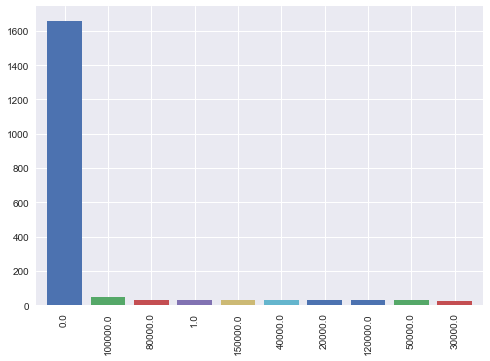

In [39]:
# sns.countplot(x='year_built', data=propert)
propert['size_sf'].value_counts().head(10).plot.bar(width=.8)

In [277]:
##label encode the string data for the property file.
ls = ['building_status', 'building_tax_expenses', 'city', 'class', 'county', 'sale_status', 'portfolio', 'market',
     'property_type_1', 'region__c','sale_date__c']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in ls:
    le = preprocessing.LabelEncoder()
    propert[i] = le.fit_transform(propert[i])

In [282]:
propert.drop(['sale_year'],axis=1,inplace=True)

### knn on property file

In [372]:
##KNN to get 5 nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(propert.iloc[:,1:], propert['id_props'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [283]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(propert.iloc[:,1:])
distances, indices = nbrs.kneighbors(propert.iloc[:,1:])

In [287]:
indices[5113:5115]
distances[5113:5114]
propert[propert.index == 1435]

array([[5113, 1435],
       [5114, 6164]], dtype=int64)

array([[     0.        ,  37932.99438071]])

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_sq_ft,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built
1435,a0I2A00000XQHKTUA5,0,3201,1539,0,495,0,0,196,1.0,...,314.18,0.0,6,5,21395000.0,1174,2.411,68098.0,1.0,2002.0


In [288]:
propert[propert.id_props == 'a0I2A00000XQK1YUAX']
propert[(propert.price_per_sq_ft<300) & (propert.price_per_sq_ft>150)]

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_sq_ft,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built
5113,a0I2A00000XQK1YUAX,0,2758,1273,3,350,0,0,170,1.0,...,202.47,0.0,8,4,21400000.0,1191,9.661,105696.0,1.0,1999.0


,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_sq_ft,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built
10,a0I2A00000XQGLCUA5,3,3875,1154,3,416,0,0,232,1.0,...,188.83,0.00,8,3,19000000.0,1956,0.000000,100621.0,1.0,1999.0
35,a0I2A00000XQGM3UAP,0,2574,1336,0,570,0,1,179,18.0,...,150.69,173295.23,5,0,60999920.0,170,24.950000,404800.0,352.0,1996.0
37,a0I2A00000XQGM8UAP,0,3342,721,0,248,0,1,99,22.0,...,157.20,146500.00,5,4,62702000.0,2016,15.700000,398868.0,428.0,2000.0
42,a0I2A00000XQGMJUA5,0,3841,72,0,597,0,1,14,1.0,...,222.28,0.00,6,4,22500000.0,1871,8.810000,101223.0,1.0,2001.0
45,a0I2A00000XQGMOUA5,0,3664,411,3,67,0,0,143,1.0,...,249.55,0.00,8,3,92750000.0,1411,0.991600,371672.0,1.0,1988.0
59,a0I2A00000XQGMmUAP,3,3875,1311,3,569,0,1,57,4.0,...,229.74,0.00,8,3,32273874.0,1619,9.708999,140480.0,1.0,2013.0
61,a0I2A00000XQGMpUAP,0,3758,807,1,411,0,1,163,11.0,...,213.70,216842.80,5,3,65052839.0,819,16.940000,304408.0,300.0,2002.0
74,a0I2A00000XQGN6UAP,0,2897,795,1,298,0,1,204,7.0,...,163.55,151315.79,5,5,11500000.0,1670,3.400000,70315.0,76.0,2002.0
81,a0I2A00000XQGNLUA5,0,343,355,1,9,0,1,171,14.0,...,204.83,200772.39,5,0,53807000.0,718,45.000000,262686.0,268.0,1999.0
90,a0I2A00000XQGNoUAP,0,3157,1359,0,133,0,0,54,2.0,...,176.77,0.00,6,4,54350000.0,2143,20.150000,307468.0,1.0,2001.0


In [373]:
##set the index value as row for test to get from accounts table.
propert.reset_index(inplace = True)
index1 = propert['index']

In [374]:
##get all values from ds and make same predictions for all the same.
kk=[]
for i in ds.values():
    for j in i:
        kk.append(j)
len(set(kk))
# test.head()

69

In [375]:
index1 = propert['index'].loc[propert['id_props'].isin(kk)].values

In [376]:
index1

array([ 115,  393,  515,  552,  635,  702,  944, 1088, 1160, 1304, 1371,
       1377, 1447, 1604, 2122, 2530, 2891, 2911, 3203, 3428, 3889, 4000,
       4202, 4333, 4425, 4473, 4774, 4918, 5057, 5352, 5438, 5644, 5774,
       5989, 5994, 6004, 6315, 6335, 6371, 6406, 6566, 6589, 6663, 6732,
       6754, 7197, 7250, 7303, 7308, 7315, 7349, 7354, 7552, 7808, 7883,
       7923, 8003, 8144, 8161, 8216, 8245, 8436, 8456, 8464, 8873, 9158,
       9387, 9434, 9965], dtype=int64)

In [377]:
##get top 5 neighbours
top5ids = neigh.kneighbors(propert.iloc[index1,2:])[1]
print(neigh.kneighbors(propert.iloc[index1,2:])[1])

[[ 115 7379 7374 7989 4262]
 [ 393  642 2041   26 2852]
 [ 515  979 7699 1056 2176]
 [ 552 3303 1010 7925 2353]
 [ 635 8506 1570 4529 8539]
 [ 702  899 1376  540 3132]
 [ 944  844 2437 5818 8322]
 [1088 2177 7011 8737 5644]
 [1160 5590 7213 1451 8813]
 [1304 6583  433 2255  431]
 [1371 9210 8984 5259 7675]
 [1377 6919 4900  668 5963]
 [1447 3071 6966 6631 1736]
 [1604 2685 2846 2465 4633]
 [2122 7139 2165 4014 8987]
 [2530 7281 9443 7476 8762]
 [2891 5518 4133 2142 8032]
 [2911 8618 7641 1510 7751]
 [3203 7318 4167 3709 4215]
 [3428 3634 3644 5982 1903]
 [3889 5413 4099  716 4807]
 [4000 9051 6297 9547 8901]
 [4202 3002 8667 9071 1695]
 [4333 2260 8698  934 3478]
 [4425 4470 7462 5001 1332]
 [4473 7464 2414 5997 1922]
 [4774 3108 7747 3869 3270]
 [4918 1536 5374  629 3923]
 [5057 7803 6740 3635 9536]
 [5352 7362 6819 2658 2006]
 [5438 5283 1484 9124 2341]
 [5644 7011 2177 1088 8737]
 [5774 7366 2158 1786 6197]
 [5989 3442 6749 3426 3486]
 [5994 2910 7742 3455 5855]
 [6004 5245  738 972

In [378]:
propert.head()

,index,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,...,price_per_sq_ft,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built
0,0,a0I2A00000XQGKnUAP,3,4862,1491,0,384,1,1,218,...,1141.55,2109090.91,5,3,21440582.78,852,19.60,508080.0,275.0,2014.0
1,1,a0I2A00000XQGKtUAP,3,4862,483,0,297,0,0,66,...,0.00,0.00,5,5,0.00,2483,0.67,62524.0,100.0,2014.0
2,2,a0I2A00000XQGKwUAP,3,4862,322,3,57,0,0,27,...,0.00,0.00,8,4,0.00,2483,0.00,8640.0,1.0,2012.0
3,3,a0I2A00000XQGKxUAP,3,4862,209,3,333,0,0,135,...,0.00,0.00,2,3,0.00,2483,0.00,513734.0,1.0,2011.0
4,4,a0I2A00000XQGKzUAP,3,4862,727,1,166,0,0,99,...,126.06,106145.83,5,3,45855000.00,390,35.12,363747.0,432.0,1990.0


In [379]:
##index and id_accs dictionary 
dic_acc = {}
k = 0
all_account = propert['id_props']
for i in all_account:
    dic_acc[k] = i
    k = k+1

In [381]:
##get the test id's as key and 5 neighbour's id's as value.
dd1={}
fir = list(top5ids[:,0:1].reshape(-1))
sec = list(top5ids[:,1:2].reshape(-1))
thr  =list(top5ids[:,2:3].reshape(-1))
four  =list(top5ids[:,3:4].reshape(-1))
fif = list(top5ids[:,4:5].reshape(-1))
for i in range(69):
    #accounts['id_accs'].loc[test_acc['index'].isin([4])]
    dd1[dic_acc[fir[i]]] = [dic_acc[sec[i]], dic_acc[thr[i]], dic_acc[four[i]], dic_acc[fif[i]]]

In [382]:
len(dd1.keys())

69

In [82]:
##value is not there
dd1['a0I2A00000ZGhcMUAT']

KeyError: 'a0I2A00000ZGhcMUAT'

In [383]:
##link both ds and dd1 dictionary
dq={}
for i,j in ds.items():
    dq[i]=[]
    for k in j:
        if 'a0I2A00000ZGhcMUAT' == k:
            continue
        val = dq[i]
        val.extend(dd1[k])
        dq[i] = val

In [384]:
lk1 = []
lk2 = []
for i,j in dq.items():
    if len(j)==0:
        lk1.extend([i] * 1)
        lk2.extend([''])
    else:
        lk1.extend([i] * len(j))
        lk2.extend(j)

In [385]:
len(lk1)
len(lk2)
sub = pd.DataFrame({'id_accs': lk1,'id_prop': lk2})
sub.to_csv('submis.csv',index=False)

298

298

In [104]:
len(set(dq.keys()))
len(set(lk1))

29

29

### Submission file Prep

In [386]:
##property id's which not are in account_to_property table
prop_free = propert.loc[propert['id_props'].isin(set(propert.id_props.unique()).intersection(acc_prop.id_props.unique()))]
prop_free.shape

(8167, 24)

In [387]:
##get all values from ds and make same predictions for all the same.
kk=[]
for i in dd1.values():
    for j in i:
        kk.append(j)
len(set(kk))
# test.head()

268

In [391]:
prop_ff = prop_free.loc[prop_free['id_props'].isin(set(prop_free.id_props.unique()).intersection(set(kk)))]
# prop_ff = propert.loc[deal_prop['id_props'].isin(set(deal_prop.id_props.unique()).intersection(set(kk)))]
# [60:150] = 0.00148
# [150:] = 0.00182
b = list(prop_ff['id_props'].values)[150:]
a = list(test.id_accs.values)
len(a)
l1=[]
l2=[]
for i in a:
    for j in set(b):
        l1.append(i)
        l2.append(j)
len(l1)
len(l2)
sub = pd.DataFrame({'id_accs': l1,'id_prop': l2})
sub.to_csv('submis.csv',index=False)

29

2262

2262

## Approach & Results:
#### 1. Apply knn on account file to get the nearest neighbour for the test id's & then take those predicted account's and get there corresponding id's for property from "account to property" file.Now apply the knn on the property id's mapped from first step and get their nearest neighbour.predict for all test id's these same group id's came from knn.
#### 2. property id's which are in property table but not are in account_to_property table giving result as 0.

### Interaction Matrix

In [41]:
columns = list(account.columns)
columns.remove('id_accs')
acc_ = pd.DataFrame()
for col in columns:
    sub_ = pd.get_dummies(account[col],prefix=col,dummy_na=True)
    acc_ = pd.concat([acc_,sub_],axis=1)
    acc_.reset_index(drop=True,inplace=True)

In [ ]:
columns = list(propert.columns)
columns.remove('id_props')
prop_ = pd.DataFrame()
for col in columns:
    sub1_ = pd.get_dummies(propert[col],prefix=col,dummy_na=True)
    prop_ = pd.concat([prop_,sub1_],axis=1)
    prop_.reset_index(drop=True,inplace=True)

In [9]:
account.loc[account.id_accs == '0012A000023XsHdQAK']
test.loc[test.id_accs == '0012A000023YBFRQA4']

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
511,0012A000023XsHdQAK,437,11308,True,True,Life Insurance Company,False,False,False,False,False,True,True,False,4,433,3,456,148,4


,id_accs
15,0012A000023YBFRQA4


In [40]:
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(account.iloc[:1,1:],account.iloc[2:3,1:])
1-cosine(account.iloc[:1,1:],account.iloc[2:3,1:])

array([[ 0.99917328]])

0.9991732764936081

In [36]:
account.iloc[:3,1:]
account.iloc[:1,1:]
account.iloc[1:2,1:]

,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
0,1,2367,1,0,10,0,0,0,0,0,0,0,0,0,1,1,2,1,0
1,9,7974,1,0,13,0,0,0,0,0,1,1,0,7,2,77,18,85,7
2,891,50161,1,1,3,0,0,0,0,0,1,1,0,40,851,693,996,1167,37


,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
0,1,2367,1,0,10,0,0,0,0,0,0,0,0,0,1,1,2,1,0


,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
1,9,7974,1,0,13,0,0,0,0,0,1,1,0,7,2,77,18,85,7


In [24]:
os.chdir(r'C:\Users\royal\Downloads\bb020fc4-9-Dataset\Dataset\Property dataset')
qw = pd.read_csv('qwer.csv')
subm=pd.read_csv('prev_sub_fail.csv')

In [288]:
propert[~propert.id_props.isin(list(set(subm.id_prop.unique())))].shape

(10015, 23)

In [285]:
propert.shape

(10206, 23)

In [178]:
subm.head(30)

,id_accs,id_prop
0,0012A00002AXHJUQA5,a0I2A00000XQGjJUAX
1,0012A00002AXHJUQA5,a0I2A00000XQGkjUAH
2,0012A00002AXHJUQA5,a0I2A00000XQGotUAH
3,0012A00002AXHJUQA5,a0I2A00000XQGsoUAH
4,0012A00002AXHJUQA5,a0I2A00000XQGt3UAH
5,0012A00002AXHJUQA5,a0I2A00000XQGzFUAX
6,0012A00002AXHJUQA5,a0I2A00000XQGzpUAH
7,0012A00002AXHJUQA5,a0I2A00000XQH0TUAX
8,0012A00002AXHJUQA5,a0I2A00000XQH3gUAH
9,0012A00002AXHJUQA5,a0I2A00000XQH5zUAH


In [237]:
##submit same properties for all the test accounts.
def sub_file_all_same(l1):
    lk1 = []
    lk2 = []
    for i in test.id_accs.values:
        lk1.extend([i] * len(l1))
        lk2.extend(l1)
    sub = pd.DataFrame({'id_accs': lk1,'id_prop': lk2})
    sub.to_csv('uts.csv',index=False)
    return len(lk1)

In [175]:
sub_file_all_same(l1)

5829

In [182]:
pd.concat({k: pd.Series(v) for k, v in dd.items()})

0012A000023XlWaQAK  0    0012A000023XpKsQAK
                    1    0012A000023XmRwQAK
                    2    0012A000023XonpQAC
                    3    0012A000023XlbuQAC
0012A000023XlbuQAC  0    0012A000023XonpQAC
                    1    0012A000023XpKsQAK
                    2    0012A000023XlWaQAK
                    3    0012A000023XmRwQAK
0012A000023Xlh9QAC  0    0012A000023XsHdQAK
                    1    0012A000023XvtGQAS
                    2    0012A000023Xt67QAC
                    3    0012A000023XsS6QAK
0012A000023XlhdQAC  0    0012A000023Xlp3QAC
                    1    0012A000023Xpn2QAC
                    2    0012A000023YB67QAG
                    3    0012A000023XljZQAS
0012A000023XlkNQAS  0    0012A000023Y4bYQAS
                    1    0012A000023XlnqQAC
                    2    0012A000023YDnWQAW
                    3    0012A00002AXHJUQA5
0012A000023XlnWQAS  0    0012A000023XrTNQA0
                    1    0012A000029wHvgQAE
                    2    0012A00

In [195]:
propert[propert.id_props.isin(set(acc_prop.loc[acc_prop['id_accs'].isin(list(j))].id_props.values))]

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year
139,a0I2A00000XQGPbUAP,Proposed,2008 Combined Tax/Ops @ $5.83/sf; 2007 Combine...,City-0960,Class A,County-0403,N,False,Market-0109,1.0,...,NaN,Office,Midwest,8150000.0,8/1/2013,6.62000,101069.0,NaN,1987.0,2013.0
280,a0I2A00000XQGUnUAP,Existing,2012 Tax @ $17.16/Unit,City-0526,Class A,County-0186,N,False,Market-0065,2.0,...,NaN,Multi-Housing,West,NaN,NaN,2.03000,207598.0,191.0,2013.0,NaN
321,a0I2A00000XQGWEUA5,NaN,NaN,City-1860,NaN,County-0400,N,False,Market-0178,NaN,...,NaN,Retail,Southwest,NaN,NaN,142.00000,1319971.0,NaN,1989.0,NaN
352,a0I2A00000XQGXOUA5,NaN,NaN,City-0376,Class A,County-0160,N,False,Market-0047,NaN,...,271356.78,Medical Office Building,Midwest,54000000.0,6/1/2007,8.20000,563204.0,199.0,2015.0,2007.0
399,a0I2A00000XQGZkUAP,NaN,NaN,City-1415,Class A,County-0452,N,True,Market-0165,NaN,...,NaN,Other,Northeast,NaN,NaN,NaN,790235.0,1012.0,NaN,NaN
476,a0I2A00000XQGdDUAX,NaN,NaN,City-2120,NaN,County-0392,N,True,Market-0067,NaN,...,23.10,Self-Storage,Midwest,1445000.0,11/22/2010,NaN,NaN,62553.0,NaN,2010.0
582,a0I2A00000XQGj9UAH,NaN,NaN,City-0376,NaN,County-0160,N,True,Market-0047,NaN,...,61.89,Self-Storage,Midwest,4400000.0,11/16/2010,NaN,NaN,71094.0,NaN,2010.0
605,a0I2A00000XQGk1UAH,NaN,NaN,City-0618,NaN,County-0543,N,False,Market-0199,NaN,...,134090.91,Hotel-Lodging,West,14750000.0,4/14/2011,2.59545,66292.0,110.0,2007.0,2011.0
608,a0I2A00000XQGk4UAH,Existing,2011 Tax @ $423.56/Unit,City-1207,Class B,County-0047,N,False,Market-0165,4.0,...,8108.11,Multi-Housing,Northeast,2400000.0,9/19/2008,17.74630,463570.0,296.0,2012.0,2008.0
611,a0I2A00000XQGkAUAX,NaN,NaN,City-1186,NaN,County-0516,N,True,Market-0165,NaN,...,NaN,Self-Storage,Northeast,NaN,NaN,NaN,NaN,82005.0,2006.0,NaN


In [196]:
lk1 = []
lk2 = []
for i,j in dd.items():
    ll = list(propert[propert.id_props.isin(set(acc_prop.loc[acc_prop['id_accs'].isin(list(j))].id_props.values))].id_props.values)
    if len(ll)==0:
        lk1.extend([i] * 1)
        lk2.extend([''])
    else:
        lk1.extend([i] * len(ll))
        lk2.extend(ll)

In [197]:
sub = pd.DataFrame({'id_accs': lk1,'id_prop': lk2})
sub.to_csv('qwer.csv',index=False)

In [198]:
len(lk2)

1187

In [142]:
dd['0012A000023XlWaQAK']
list(dd['0012A000023XlWaQAK'])

array(['a0I2A00000XQHJ7UAP', 'a0I2A00000XQLqDUAX'], dtype=object)

['a0I2A00000XQHJ7UAP', 'a0I2A00000XQLqDUAX']

In [171]:
lk1 = []
lk2 = []
for i,j in dd.items():
    ll = list(j)
    if len(ll)==0:
        lk1.extend([i] * 1)
        lk2.extend([''])
    else:
        lk1.extend([i] * len(ll))
        lk2.extend(ll)

In [172]:
len(lk1)

103

In [174]:
ll1 = []
for i in dd.values():
    ll1.extend(list(i))

In [199]:
sub_file_all_same(lk2)

34423

In [246]:
account[account.id_accs=='0012A000023YDnWQAW']

,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
11,0012A000023YDnWQAW,606,217301,True,True,Life Insurance Company,False,False,False,False,False,True,True,False,51,555,108,664,381,38


In [245]:
propert[propert.id_props.isin(['a0I2A00000XQK1YUAX','a0I2A00000XQLImUAP'])]

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year
5113,a0I2A00000XQK1YUAX,Existing,2016 Tax @ $2.27/sf,City-1606,NaN,County-0400,N,False,Market-0178,1.0,...,NaN,Retail,Southwest,21400000.0,4/23/2008,9.661,105696.0,NaN,1999.0,2008.0
6997,a0I2A00000XQLImUAP,NaN,NaN,City-1510,NaN,County-0464,N,True,Market-0169,NaN,...,NaN,Retail,Southwest,NaN,NaN,NaN,161568.0,NaN,2010.0,NaN


In [213]:
acc_prop[acc_prop.id_props == 'a0I2A00000XQLImUAP']

,id,id_accs,id_props


In [247]:
oppor[oppor.id_deals.isin(list(deal_prop[deal_prop.id_props.isin(['a0I2A00000XQLImUAP','a0I2A00000XQK1YUAX'])].id_deals.values))]
deal_prop[deal_prop.id_props == 'a0I2A00000XQLImUAP']
deal_prop[deal_prop.id_props == 'a0I2A00000XQK1YUAX']
# deal_prop[deal_prop.id_props == 'a0I2A00000XQIdNUAX']
account[account.id_accs.isin(list(oppor[oppor.id_deals.isin(list(deal_prop[deal_prop.id_props.isin(['a0I2A00000XQLImUAP','a0I2A00000XQK1YUAX'])].id_deals.values))].id_accs.values))]

,id_accs,accounting_date,best_initial_bid,id_deals,closedate,date_closed,deal_type,deal_update_flag,debt_yield,fiscal,fiscalquarter,fiscalyear,platform,property_group,property_type
22558,0012A000029wIP5QAM,5/15/2017,0.0,0062A00000nESasQAG,12/16/2016,5/11/2017 0:00,Fixed-rate,True,0.0,2016 4,4,2016,Debt,Retail,Retail
25001,0012A000026WVuDQAW,3/31/2017,0.0,0062A00000moEmzQAE,10/14/2016,3/31/2017 0:00,Fixed-rate,True,0.0,2016 4,4,2016,Debt,Retail,Retail


,id,id_deals,id_props
18567,a0A2A00000TzqKvUAJ,0062A00000nESasQAG,a0I2A00000XQLImUAP


,id,id_deals,id_props
14184,a0A2A00000TzoprUAB,0062A00000moEmzQAE,a0I2A00000XQK1YUAX


,id_accs,active_deals,activity_count,buyer_book,servicing_contract,investor_type,cmbs,consultant,correspondent,foreign,master_servicer,lender_book,loan_sales_book,loan_servicing,num_deals_as_client,num_deals_as_investor,number_of_properties,number_of_related_deals,number_of_related_properties,number_of_won_deals_as_client
2591,0012A000029wIP5QAM,30,9332,False,False,REIT,False,False,False,False,False,False,False,False,29,1,73,40,75,28


In [270]:
len(set(deal_prop[deal_prop.id_deals.isin(list(oppor.id_deals.values))].id))
len(set(deal_prop[deal_prop.id_props.isin(list(propert.id_props.values))].id))
aa1 = list(set(deal_prop[deal_prop.id_props.isin(list(propert.id_props.values))].id_props) - set(deal_prop[deal_prop.id_deals.isin(list(oppor.id_deals.values))].id_props))

bb1 = list(set(aa1) - set(acc_prop.id_props))

17771

12013

In [274]:
cc1 = propert[propert.id_props.isin(aa1)]
cc1[cc1.id_props == 'a0I2A00000XQK1YUAX']

,id_props,building_status,building_tax_expenses,city,class,county,sale_status,portfolio,market,num_buildings,...,price_per_unit,property_type_1,region__c,sale_amount__c,sale_date__c,size_acres,size_sf,size_units,year_built,sale_year


In [254]:
# account[account.id_accs.isin(list(oppor[oppor.id_deals.isin(list(deal_prop[deal_prop.id_props.isin(list(propert.id_props.values))].id_deals.values))].id_accs.values))]
deal_prop[deal_prop.id_deals.isin(list(oppor.id_deals.values))].subtract(deal_prop[deal_prop.id_props.isin(list(propert.id_props.values))])
deal_prop[deal_prop.id_props.isin(list(propert.id_props.values))]

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [291]:
pp = oppor[(oppor.fiscalyear==2016) & (oppor.property_group == 'Retail') & (oppor.platform == 'Debt') & (oppor.deal_update_flag == True)]

In [297]:
deal_prop[deal_prop.id_deals.isin(list(pp.id_deals.values))].shape
account[account.id_accs.isin(list(pp.id_accs.values))].shape

pp[pp.id_accs.isin(list(account.id_accs.values))].shape

deal_prop[deal_prop.id_deals.isin(list(pp.id_deals.values))](pp[pp.id_accs.isin(list(account.id_accs.values))])

(184, 3)

(48, 20)

(91, 15)

,accounting_date,best_initial_bid,closedate,date_closed,deal_type,deal_update_flag,debt_yield,fiscal,fiscalquarter,fiscalyear,id,id_accs,id_deals,id_props,platform,property_group,property_type
1231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [240]:
os.chdir(r'C:\Users\royal\Downloads')
#,'a0I2A00000XQIdNUAX'
sub_file_all_same(['a0I2A00000XQLImUAP','a0I2A00000XQK1YUAX'])

58

In [337]:
sub_file_all_same(list(set(deal_prop[deal_prop.id_deals.isin(list(pp.id_deals.values))][110:111].id_props.values)))

29

In [303]:
q= deal_prop[deal_prop.id_deals.isin(list(pp.id_deals.values))]
q[q.id_props == 'a0I2A00000XQK1YUAX']

,id,id_deals,id_props
14184,a0A2A00000TzoprUAB,0062A00000moEmzQAE,a0I2A00000XQK1YUAX
